# Credit Card Fraud Detection

This project is to detect the fraudulent transactions in a dataset of credit card transactions (source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud). Most of the features have been anonymised for privacy and scaled beforehand, so it will be interesting to see how to proceed without knowing anything about the attributes!

In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections

# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# EDA

Percentage distribution of classes:
0    99.827251
1     0.172749
Name: Class, dtype: float64


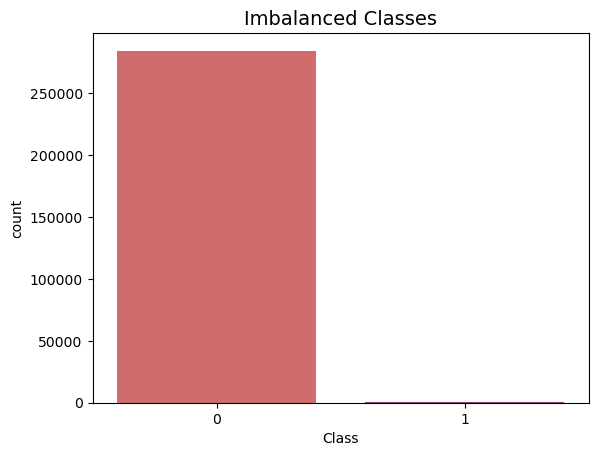

In [5]:
print("Percentage distribution of classes:")
print(df['Class'].value_counts() / len(df) * 100)

sns.countplot(x='Class', data=df, palette='flare')
plt.title('Imbalanced Classes', fontsize=14)
plt.show()

In [6]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


## Random undersampling

We will undersample the dominant class(non-fraud) to be equal to number of fraud cases so that our under-sampled data is a 50-50 split. We will then shuffle the data to maintain a level of accuracy.

In [7]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df_shuffle = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df_shuffle.loc[df['Class'] == 1]
non_fraud_df = df_shuffle.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
183574,1.385242,-1.363964,-0.657082,0.534340,-0.430419,1.060252,-0.572189,0.361148,1.517749,-0.403804,...,0.994376,-0.006994,-1.096159,-0.418115,-0.133418,0.046650,-0.008485,0,3.156431,0.483641
198868,0.432554,1.861373,-4.310353,2.448080,4.574094,-2.979912,-2.792379,-2.719867,-0.276704,-2.314747,...,-0.348904,-3.979948,-0.828156,-2.419446,-0.767070,0.387039,0.319402,1,-0.293440,0.563869
165751,0.817502,-1.429292,-0.774221,4.461494,-0.467082,0.668422,0.468131,-0.014315,-0.313169,1.031156,...,0.260021,-0.308852,1.114362,-0.146847,0.024415,-0.108182,0.057062,0,7.291833,0.386952
172787,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,-4.820779,...,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,1,1.713407,0.429352
251866,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,-3.926510,...,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,1,-0.252917,0.832282


## Equally distributing and correlating: analysis and preprocessing

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


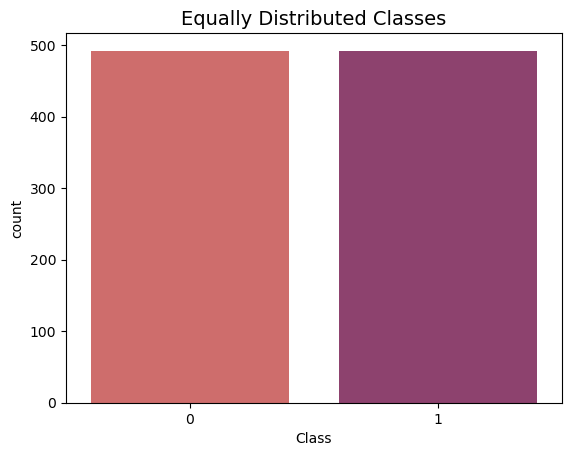

In [8]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette='flare')
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

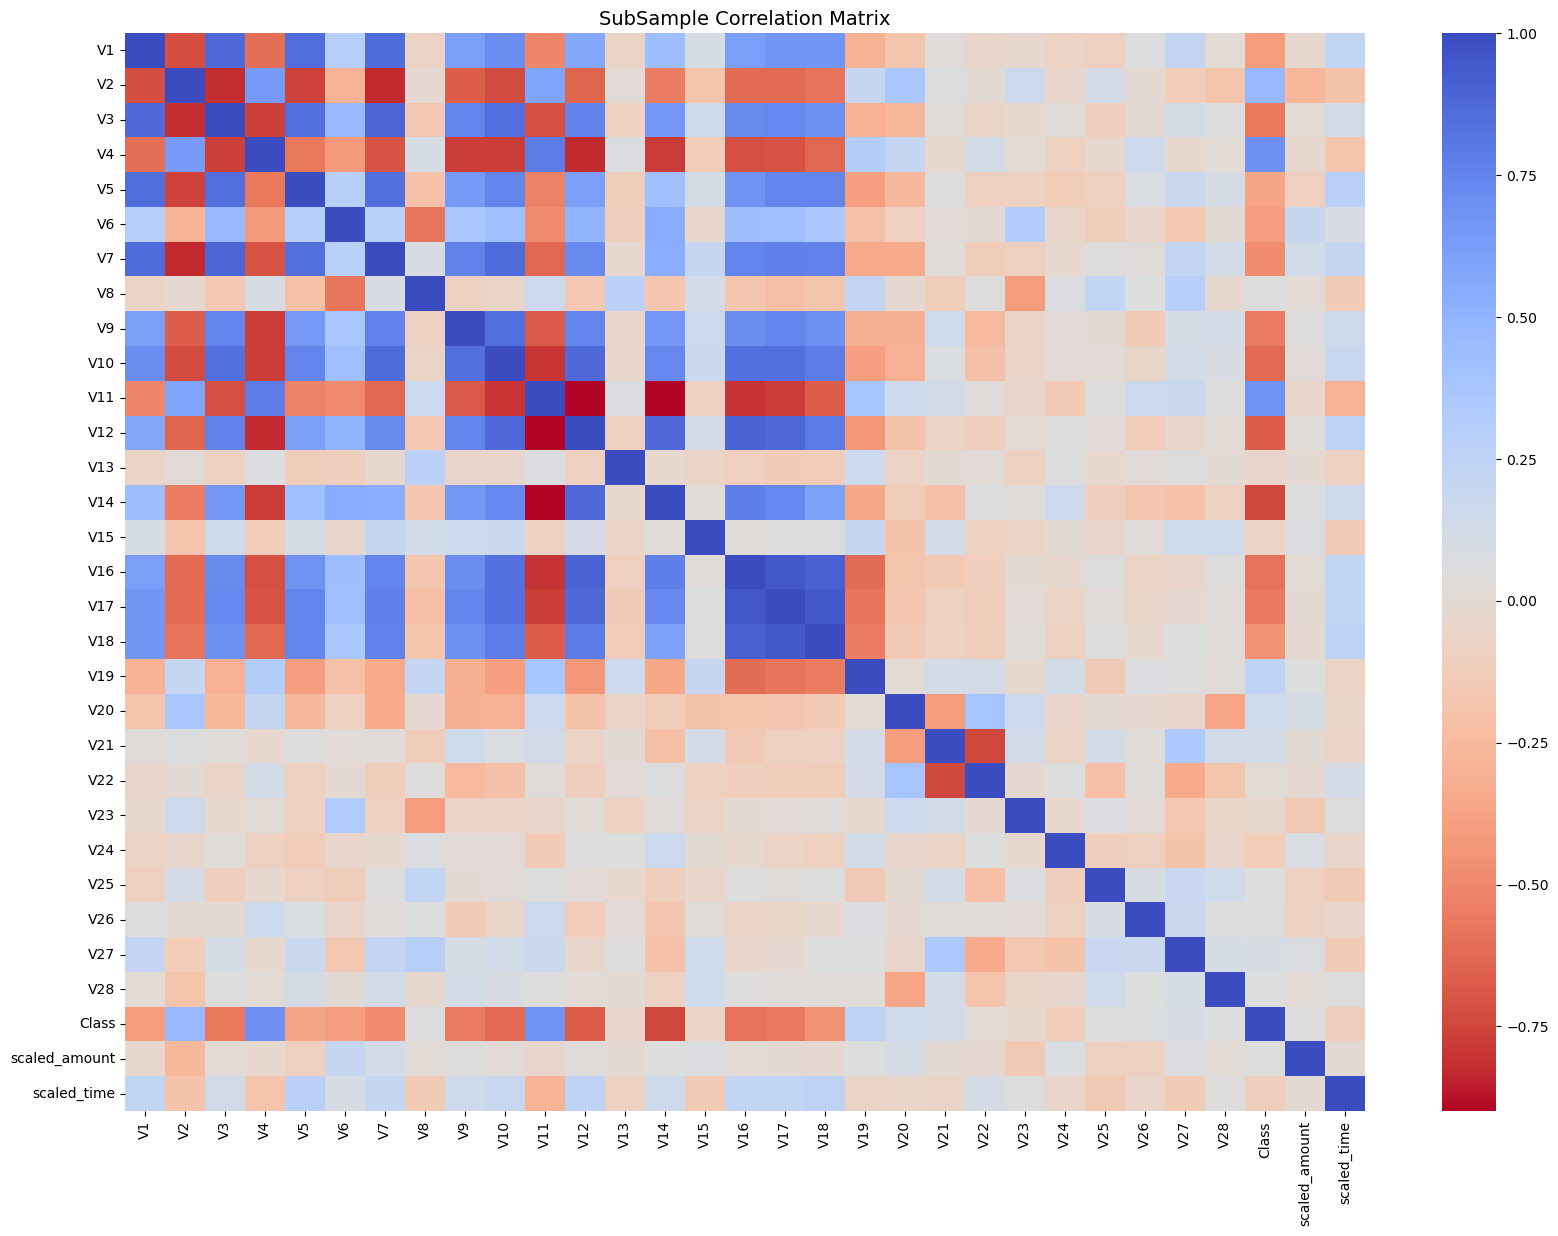

In [9]:
figure, axes = plt.subplots(1,figsize=(20,14))

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r')
plt.title('SubSample Correlation Matrix', fontsize=14)
plt.show()

* **Negative Correlations with Class:** V10, V12, V14, V16
* **Positive Correlations with Class:** V2, V4, V11, V19

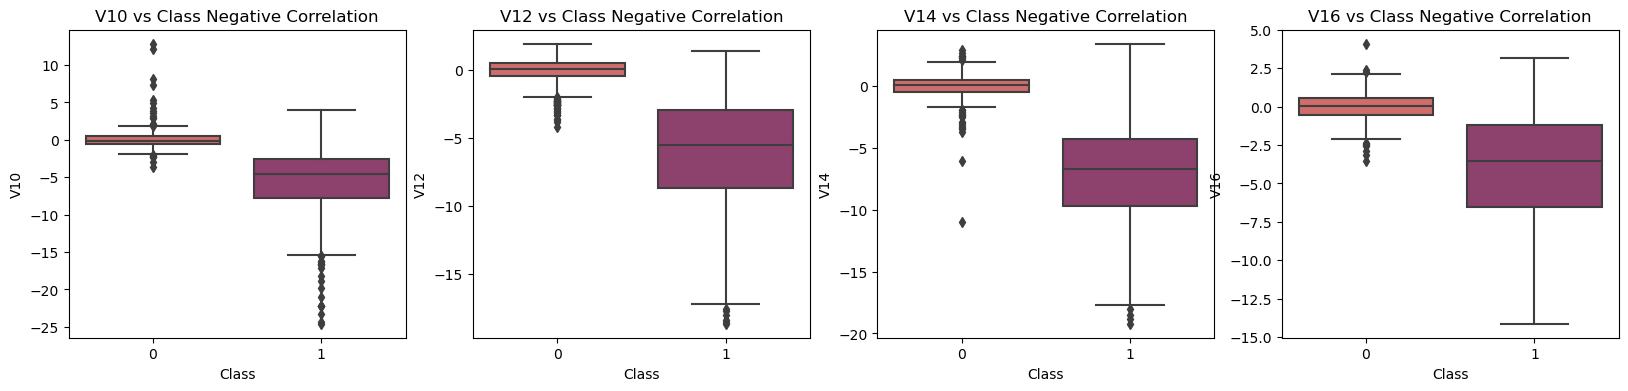

In [10]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class
sns.boxplot(x="Class", y="V10", data=new_df, palette='flare', ax=axes[0])
axes[0].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_df, palette='flare', ax=axes[1])
axes[1].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_df, palette='flare', ax=axes[2])
axes[2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V16", data=new_df, palette='flare', ax=axes[3])
axes[3].set_title('V16 vs Class Negative Correlation')

plt.show()

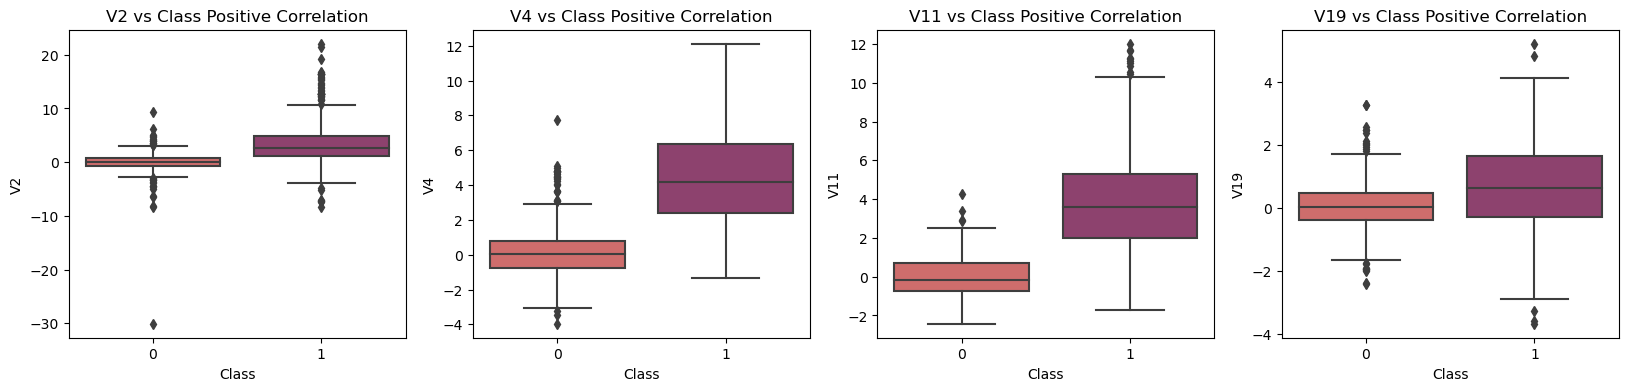

In [11]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations
sns.boxplot(x="Class", y="V2", data=new_df, palette='flare', ax=axes[0])
axes[0].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=new_df, palette='flare', ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V11", data=new_df, palette='flare', ax=axes[2])
axes[2].set_title('V11 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=new_df, palette='flare', ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

## Anomaly Detection

Removing Outliers from Highly Correlated features to improve accuracy

In [12]:
def remoutlier(x):
    x_fraud = x
    q25, q75 = np.percentile(x_fraud, 25), np.percentile(x_fraud, 75)
    print(f'Quartile 25: {q25} | Quartile 75: {q75}')
    iqr = q75 - q25
    print(f'IQR: {iqr}')
    
    cutoff = iqr * 1.5
    x_lower, x_upper = q25 - cutoff, q75 + cutoff
    print(f'Cut Off: {cutoff}')
    print(f'Lower: {x_lower}')
    print(f'Upper: {x_upper}')
    return x_lower, x_upper

In [13]:
features = ['V14', 'V12', 'V10']

for feature in features:
    print(f"For Feature {feature}:")
    x_fraud = new_df[feature].loc[new_df['Class'] == 1].values
    x_lower, x_upper = remoutlier(x_fraud)
    outliers = [x for x in x_fraud if x < x_lower or x > x_upper]
    print(f'Feature Outliers for Fraud Cases: {len(outliers)}')
    new_df = new_df.drop(new_df[(new_df[feature] > x_upper) | (new_df[feature] < x_lower)].index)
    print('-' * 100)

For Feature V14:
Quartile 25: -9.692722964972386 | Quartile 75: -4.282820849486865
IQR: 5.409902115485521
Cut Off: 8.114853173228282
Lower: -17.807576138200666
Upper: 3.8320323237414167
Feature Outliers for Fraud Cases: 4
----------------------------------------------------------------------------------------------------
For Feature V12:
Quartile 25: -8.67303320439115 | Quartile 75: -2.893030568676315
IQR: 5.780002635714835
Cut Off: 8.670003953572252
Lower: -17.3430371579634
Upper: 5.776973384895937
Feature Outliers for Fraud Cases: 4
----------------------------------------------------------------------------------------------------
For Feature V10:
Quartile 25: -7.466658535821847 | Quartile 75: -2.5118611381562523
IQR: 4.954797397665595
Cut Off: 7.432196096498393
Lower: -14.89885463232024
Upper: 4.92033495834214
Feature Outliers for Fraud Cases: 27
----------------------------------------------------------------------------------------------------


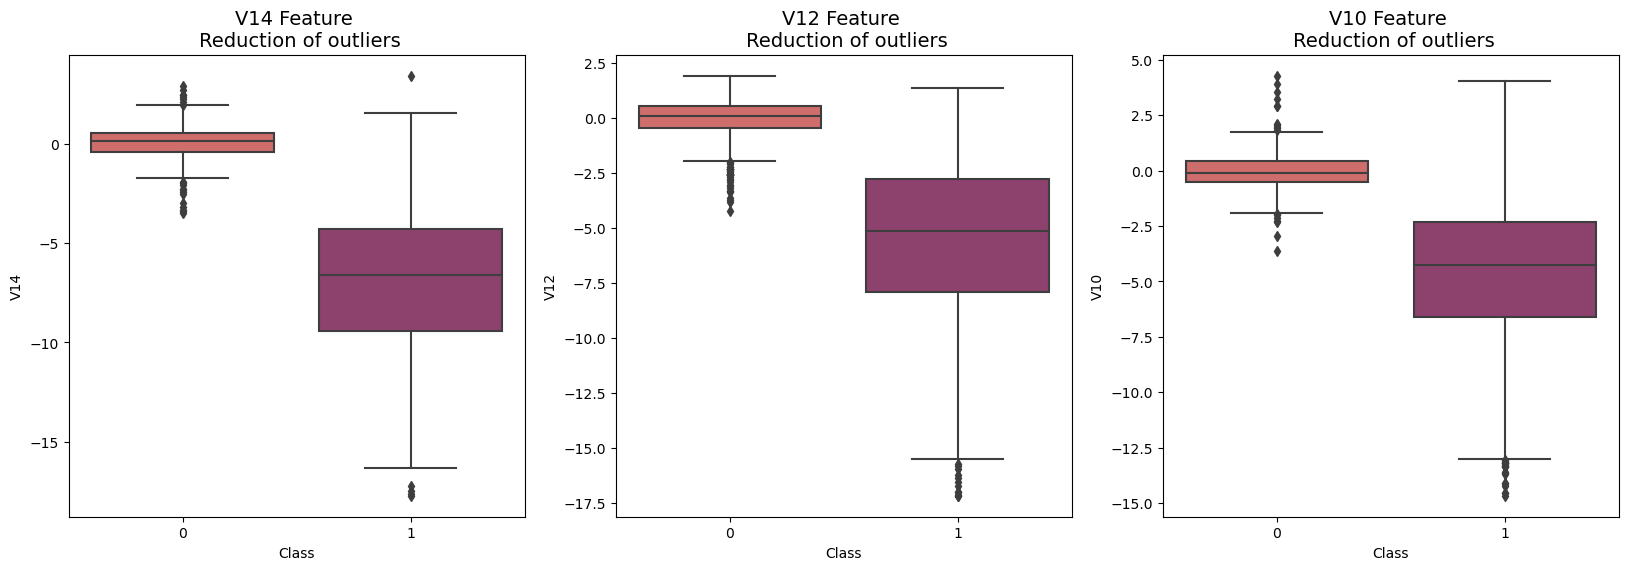

In [14]:
#Checking if removed
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette='flare')
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette='flare')
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette='flare')
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)

plt.show()

## Dimensionality Reduction and Clustering

In [15]:
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('Class', axis=1)
y = new_df['Class']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 5.8 s
PCA took 0.007 s
Truncated SVD took 0.005 s


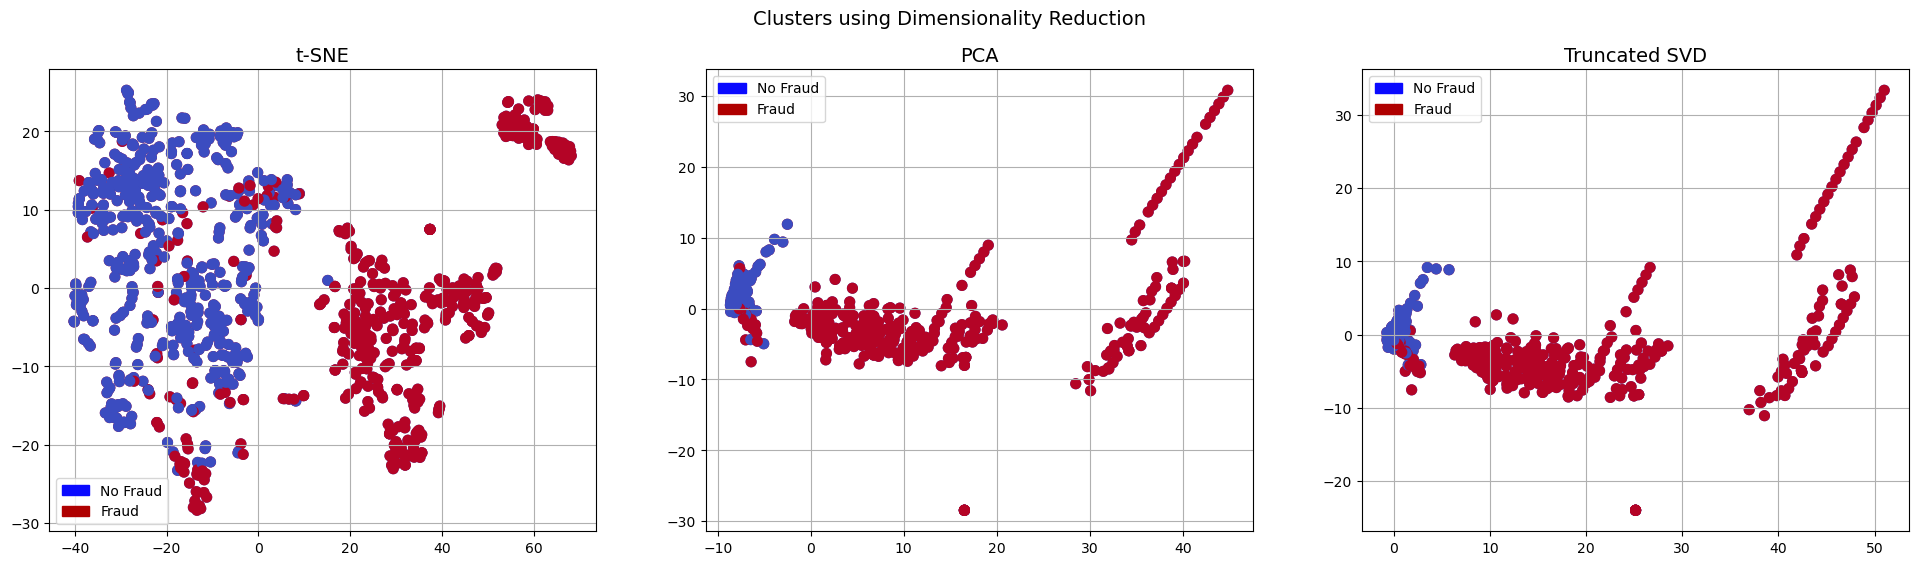

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

The t-SNE algorithm can pretty accurately cluster the cases that were fraud and non-fraud in our dataset, despite the subsample being small. This gives us an indication that further predictive models will perform pretty well in separating fraud cases from non-fraud cases.


## Modeling - Classification

We implement the Logistic Regression and Support Vector Machine classifiers and evaluate their performance metrics like AUC score. Later on we use GridSearch to find the best parameters for a set of classifiers and compare the results using visualisations

In [17]:
#Splitting into train and test sets
from sklearn.model_selection import train_test_split

In [18]:
X = new_df.drop('Class', axis=1)
y = new_df['Class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression

In [21]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [22]:
predictions_logreg = logmodel.predict(X_test)

In [23]:
from sklearn.metrics import classification_report

In [24]:
# Logistic Regression Classification report
print(classification_report(y_test,predictions_logreg))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       170
           1       0.96      0.89      0.92       142

    accuracy                           0.93       312
   macro avg       0.94      0.93      0.93       312
weighted avg       0.93      0.93      0.93       312



In [25]:
#Logistic Regression AUC Score
auc_score = roc_auc_score(y_test, logmodel.predict_proba(X_test)[::,1])
print(f"AUC Score: {auc_score}")

AUC Score: 0.9626967688483844


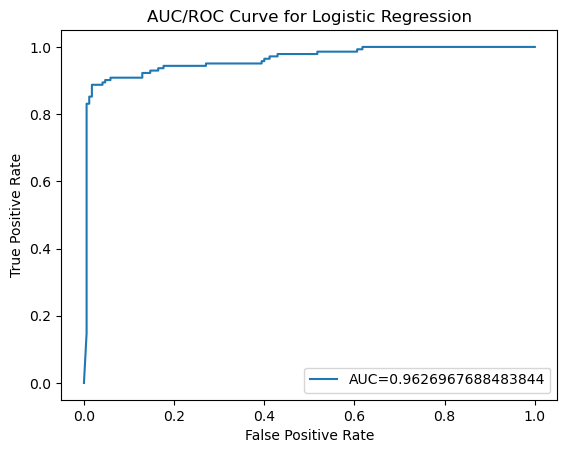

In [26]:
#Logistic Regression AUC/ROC graph
#define metrics
y_pred_proba = logmodel.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC/ROC Curve for Logistic Regression')
plt.legend(loc=4)
plt.show()

Thus for Logistic Regression we get good precision and recall as well as a high AUC score. 

Next we will analyse the Support Vector Machine classifier in depth and some other classifiers by using GridSearch to get the best parameters.

In [27]:
# Using GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV


# Logistic Regression
# I did another one just to see what GridSearch would return

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_
log_reg_pred = grid_log_reg.predict(X_test)

# K Nearest Neighbors
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
knears_neighbors = grid_knears.best_estimator_
knears_pred = grid_knears.predict(X_test)

# Support Vector Machine
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_
svc_pred = grid_svc.predict(X_test)

# Decision Tree
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_
tree_pred = grid_tree.predict(X_test)

In [28]:
#SVM Classification report
predictions_svc = grid_svc.predict(X_test)

print(classification_report(y_test,predictions_svc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       170
           1       0.97      0.88      0.92       142

    accuracy                           0.93       312
   macro avg       0.94      0.93      0.93       312
weighted avg       0.94      0.93      0.93       312



In [29]:
#SVM AUC Score
auc_score = roc_auc_score(y_test, grid_svc.decision_function(X_test))
print(f"AUC Score: {auc_score}")

AUC Score: 0.9584921292460648


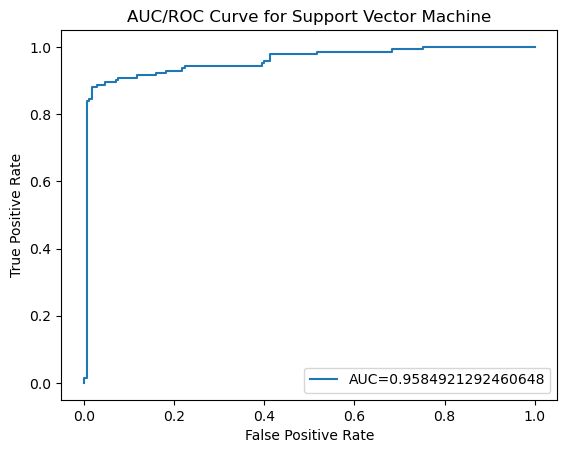

In [30]:
#SVM AUC/ROC Graph
#define metrics
y_test_pred = grid_svc.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_test_pred)
auc = roc_auc_score(y_test, y_test_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('AUC/ROC Curve for Support Vector Machine')
plt.legend(loc=4)
plt.show()

Thus for Support Vector Machine(SVC) as well we get good precision and recall and a high AUC score, albeit slightly less than that of Logistic Regression 

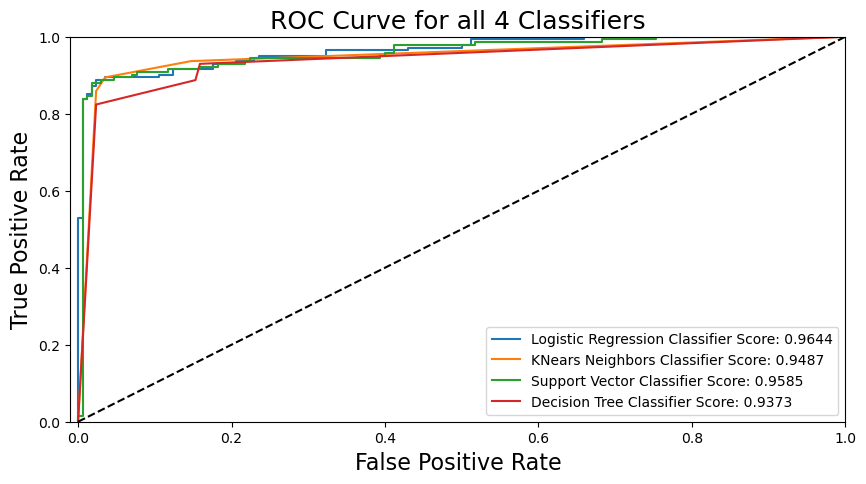

In [31]:
# AUC/ROC Graph of all classifiers
log_fpr, log_tpr, log_thresold = roc_curve(y_test, grid_log_reg.decision_function(X_test))
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_test, grid_knears.predict_proba(X_test)[:, 1])
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_test, grid_svc.decision_function(X_test))
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_test, grid_tree.predict_proba(X_test)[:, 1])


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(10,5))
    plt.title('ROC Curve for all 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_test, grid_log_reg.decision_function(X_test))))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_test, grid_knears.predict_proba(X_test)[:, 1])))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_test, grid_svc.decision_function(X_test))))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_test, grid_tree.predict_proba(X_test)[:, 1])))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()



We see that among all classifiers, Logistic Regression and Support Vector Machines are the best performing ones, as seen in the combined AUC/ROC graph.

## Thank You!